In [1]:
# Import or all the tools we need

# Regular EDA (Exploratory Data Analysis ) and plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to be inside our notebooks
%matplotlib inline

# Import Scikit-learn Machine learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score,f1_score,precision_score
from sklearn.metrics import plot_roc_curve



# Load the Data into The Notebook

In [2]:
# Data Source : https://www.kaggle.com/niteshyadav3103/breast-cancer-classification
df =pd.read_csv("breast-cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop(['id'],axis=1,inplace=True)

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
df["diagnosis"] =df["diagnosis"].apply(lambda val : 1 if val == "M" else 0)

In [9]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [10]:
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


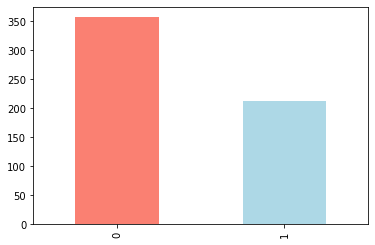

In [11]:
df["diagnosis"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [12]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
# Checking Correlations
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


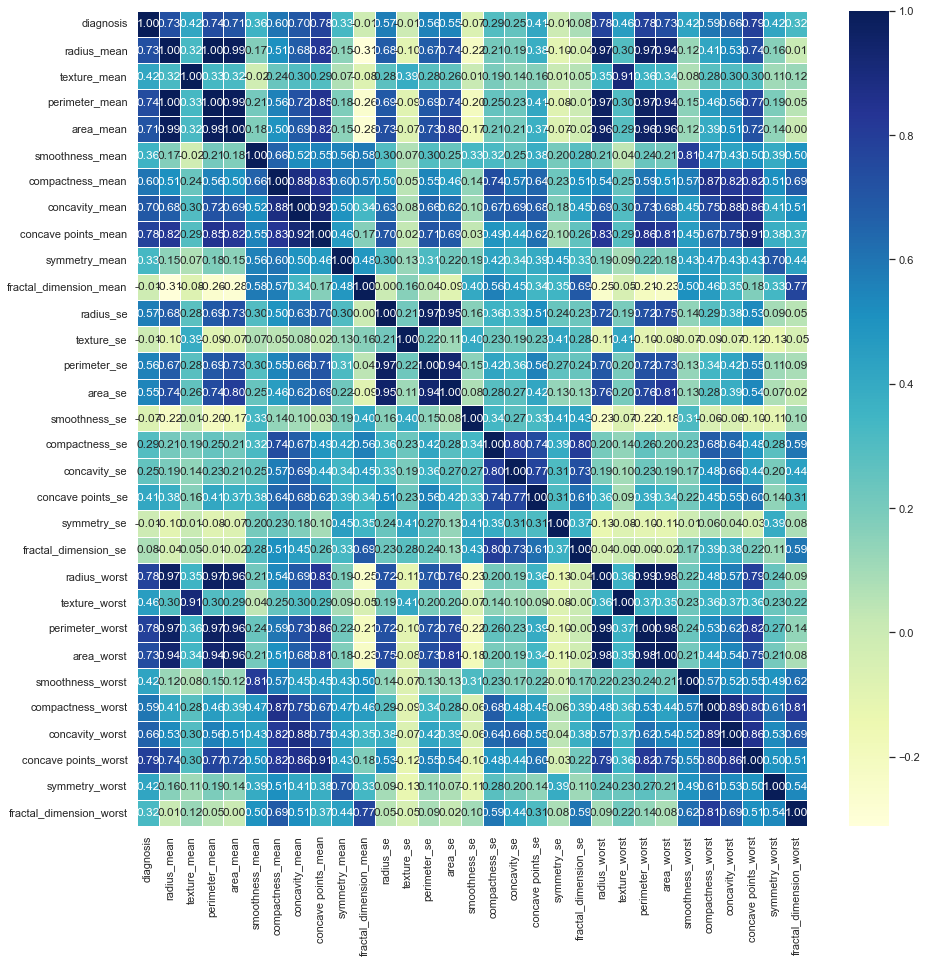

In [14]:
# Let's make the correlation more prettier using seaborn heapmap
cor_matrix =df.corr()
sns. set(font_scale=1.0)
fig,ax =plt.subplots(figsize=(15,15))

ax =sns.heatmap(cor_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");

# Modeling the Data

In [15]:
# Split the Data into X and Test y
X= df.drop("diagnosis",axis=1)
y =df["diagnosis"]

In [16]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [18]:
# Split Data into training and testing Data
np.random.seed(42)
X_train,X_test,y_train,y_test =train_test_split(X,
                                               y,
                                               test_size=0.2)

In [19]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [20]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


In [21]:
y_train

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64

In [22]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

# We are going to be using three machine Learning models for our Classification Projects:
* Logistic Regression
* K-Nearest Neighbors
* RandomForest Classifier

In [23]:
# Put models in a dictionary
models ={"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()
        }

# Create a function to fit and score our models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    models : A dictionary of Scikit learn machine learning models
    Fit and Evaluate given machine learning models.
    X_train: training data (No label)
    X_test: testing data(no label)
    y_train :traing label
    y_test: testing label
    
    """
    
    # Set a Random seed
    np.random.seed(42)
    
    # Make a dictionary to keep the model
    model_scores ={}
    
    # Loop through models
    for name,model in models.items():
        # Fit the model
        model.fit(X_train,y_train)
        
        # Evalaute the model and append it's model score
        model_scores[name] =model.score(X_test,y_test)
        
    return model_scores
        


In [24]:
model_scores =fit_and_score(models=models,
                            X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\Users\ISAAC\Desktop\ML-Course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.956140350877193,
 'KNN': 0.956140350877193,
 'Random Forest': 0.9649122807017544}

# Model Comparison

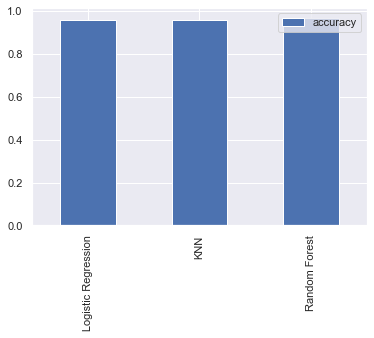

In [25]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we've got baseline predictions and we know that first model prediction is not what we will base our next steps .
what should we do?

Let's Look at the following:

* Hyperparameter Tunning
* Feature Importance
* Confusion Matrix
* cross_validation
* Precision 
* Recall
* F1 Score
*  Classification Report
* ROC Curve
* Area under the Curve(AUC)

### Hyperparameter Tunning( By Hand)

In [26]:
# Let's Tune KNN
train_scores=[]
test_scores=[]


# Create a list of different values for n-neighbors
neighbors =range(1,21)

# Setup KNN instances
knn=KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #Fit the Model
    knn.fit(X_train,y_train)
    # Update the training list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the  testing list
    test_scores.append(knn.score(X_train,y_train))


In [27]:
test_scores

[1.0,
 0.9428571428571428,
 0.9494505494505494,
 0.9406593406593406,
 0.9406593406593406,
 0.9362637362637363,
 0.9406593406593406,
 0.9318681318681319,
 0.9318681318681319,
 0.9274725274725275,
 0.9318681318681319,
 0.9230769230769231,
 0.9296703296703297,
 0.9252747252747253,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9208791208791208,
 0.9208791208791208,
 0.9208791208791208]

In [28]:
train_scores

[1.0,
 0.9428571428571428,
 0.9494505494505494,
 0.9406593406593406,
 0.9406593406593406,
 0.9362637362637363,
 0.9406593406593406,
 0.9318681318681319,
 0.9318681318681319,
 0.9274725274725275,
 0.9318681318681319,
 0.9230769230769231,
 0.9296703296703297,
 0.9252747252747253,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9208791208791208,
 0.9208791208791208,
 0.9208791208791208]

 Maximum KNN score on the test data 100.000000:


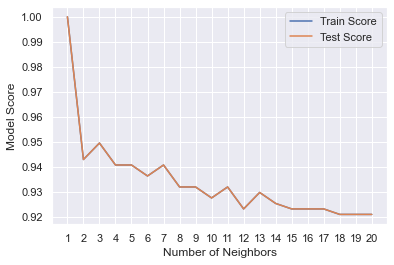

In [29]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label ="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f" Maximum KNN score on the test data {max(test_scores)*100:2f}:");

# Hyper parameter Tunning with RandomizedSearchCV
We're going to tune:
* LogisticRegression(),
* RandomomForestClassifier()
...Using RandomizedSearchCV

In [30]:
# Craete Hyperparameter Grid for Logistic Regression
log_reg_grid ={"C":np.logspace(-4,5,25),
              "solver":["newton-cg","liblinear"]}

# Create Hyperparameter for RandomForestClassifier
rf_grid ={"max_features":["auto","sqrt"],
         "n_estimators":np.arange(20,1500,50),
         "min_samples_split":np.arange(2,20,21),
         "min_samples_leaf":np.arange(1,20,2)}

In [31]:
# Tune Logistic Regression
np.random.seed(42)

# Set up random hyperparameter search for Logistic Regression
rs_log_reg =RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
# Fit Random Hyperparameters for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\ISAAC\Desktop\ML-Course\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ISAAC\Desktop\ML-Course\env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ISAAC\Desktop\ML-Course\env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ISAAC\Desktop\ML-Course\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ISAAC\Desktop\ML-Course\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warni

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.37137371e-04, 5.62341325e-04, 1.33352143e-03,
       3.16227766e-03, 7.49894209e-03, 1.77827941e-02, 4.21696503e-02,
       1.00000000e-01, 2.37137371e-01, 5.62341325e-01, 1.33352143e+00,
       3.16227766e+00, 7.49894209e+00, 1.77827941e+01, 4.21696503e+01,
       1.00000000e+02, 2.37137371e+02, 5.62341325e+02, 1.33352143e+03,
       3.16227766e+03, 7.49894209e+03, 1.77827941e+04, 4.21696503e+04,
       1.00000000e+05]),
                                        'solver': ['newton-cg', 'liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'solver': 'newton-cg', 'C': 42.169650342858226}

In [33]:
rs_log_reg.score(X_test,y_test)

0.956140350877193

Now we've tune LogisticRegression ,Let us do same for RandomforestClassifier

In [34]:
# Setup Random Seed
np.random.seed(42)

rs_rf =RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
# Fit Random Hyperparameters for RandomForestClassifier()
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2]),
                                        'n_estimators': array([  20,   70,  120,  170,  220,  270,  320,  370,  420,  470,  520,
        570,  620,  670,  720,  770,  820,  870,  920,  970, 1020, 1070,
       1120, 1170, 1220, 1270, 1320, 1370, 1420, 1470])},
                   verbose=True)

In [35]:
# Finding the best parameters
rs_rf.best_params_

{'n_estimators': 520,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto'}

In [36]:
rs_rf.score(X_test,y_test)

0.9649122807017544

In [37]:
len(X)

569

In [38]:
len(df)

569

# Hyper Parameter Tuning using Grid SearchCV
...Since RandomForestClassifier() is our highest model so far, we will try to improve it further

In [39]:
#differnt model for RandomForestClassifier model
rf_grid={'n_estimators': np.arange(100,523,50),
 'min_samples_split':[ 3],
 'min_samples_leaf': [1],
 'max_features': ['auto']}
# SetUp Grid Hyperparameter for RandomForest Classifier
rs_rf =GridSearchCV(RandomForestClassifier(),
                   param_grid=rf_grid,
                    cv=5,
                    verbose=True)
# Fit Grid Hyperparameter  search Model
rs_rf.fit(X_train,y_train)



Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [3],
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500])},
             verbose=True)

In [40]:
# Find the best Parameters
rs_rf.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 400}

In [41]:
# Evaluate the Score
rs_rf.score(X_test,y_test)

0.9649122807017544

# Evaluating Our Model beyond Accuracy
We are going to evaluate our model with the following Evaluation mEtrics:

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score and we will also use `cross_val_score()` where necessary
    
    To make comparison and Evaluate our model First we need to make Predictions

In [42]:
# Make Predictions with tuned Model
y_preds= rs_rf.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [43]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

C:\Users\ISAAC\Desktop\ML-Course\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


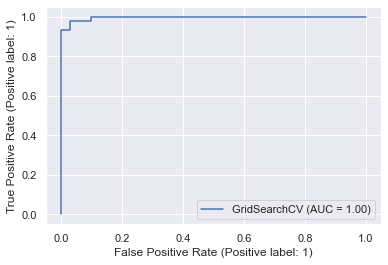

In [44]:
# Plot ROC curve and calculate AUC metrics
plot_roc_curve(rs_rf,X_test,y_test);

In [45]:
print(confusion_matrix(y_test,y_preds))

[[70  1]
 [ 3 40]]


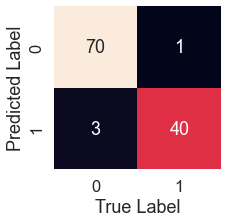

In [46]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plot a Nice Looking Confusion matrix using Seaborn heatmap
    """
    fig,ax =plt.subplots(figsize=(3,3))
    ax =sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot =True,
                   cbar =False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test,y_preds)
    
    

Now we have gotten ROC, AUC score and Confusion Matrix, Let us get validation report

In [47]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Calculate Evaluation Metrics Using Cross_validation
* We will be calculating accuracy,precision,recall and f1-score using `cross_val_score()`

In [48]:
rs_rf.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 400}

In [49]:
clf =RandomForestClassifier(max_features='auto',
                            min_samples_leaf=1,
                             min_samples_split=3,
                            n_estimators=400
                           )

In [50]:
# Cross Validation accuracy
cv_acc =cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       
                       scoring="accuracy")
cv_acc

array([0.92982456, 0.95614035, 0.98245614, 0.97368421, 0.97345133])

In [51]:
cv_acc =np.mean(cv_acc)
np.round(cv_acc,2)

0.96

In [52]:
# Cross Validation Precision
cv_precision =cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring="precision")
cv_precision

array([0.90697674, 0.97368421, 0.97619048, 1.        , 0.95348837])

In [53]:
cv_precision=np.mean(cv_precision)
np.round(cv_precision,2)

0.96

In [54]:
# Cross validation score
cv_recall =cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="recall")
cv_recall

array([0.90697674, 0.86046512, 0.97619048, 0.95238095, 0.97619048])

In [55]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9344407530454042

In [56]:
np.round(cv_recall,2)

0.93

In [57]:
# Cross validation f1_score
cv_f1 =cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1

array([0.90697674, 0.92682927, 0.97619048, 0.97560976, 0.97619048])

In [58]:
cv_f1=np.mean(cv_f1)

In [59]:
np.round(cv_f1,2)

0.95

In [60]:
# Visualize Cross validated Metrics
cv_metrics =pd.DataFrame({
    "Acurracy":cv_acc,
    "Precision":cv_precision,
    "F1 Score":cv_f1,
    "Recall":cv_recall
},index=[0])
cv_metrics

,Acurracy,Precision,F1 Score,Recall
0,0.963111,0.962068,0.952359,0.934441


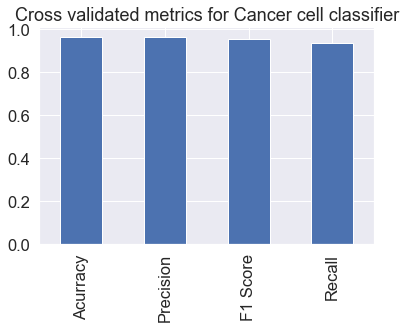

In [61]:
cv_metrics.T.plot.bar(title="Cross validated metrics for Cancer cell classifier",
                     legend=False);

# Let us find Features importance for our Algorithm
* How each of the Features contributed to the performance of our model

In [62]:
# Fit the model
clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=400)

In [63]:
importances =clf.feature_importances_
importances

array([0.03949799, 0.0140194 , 0.04883661, 0.04879205, 0.00571834,
       0.01005479, 0.03777473, 0.12268679, 0.0035322 , 0.00490645,
       0.01325991, 0.00523468, 0.017476  , 0.02622521, 0.00471845,
       0.00558664, 0.00864623, 0.00470701, 0.0042199 , 0.00531947,
       0.09299093, 0.01999911, 0.11728212, 0.11151931, 0.01297044,
       0.01767268, 0.0347338 , 0.14320297, 0.01269709, 0.00571869])

In [64]:
# Sort the features in descending order

sorted_indices = np.argsort(importances)[::-1]

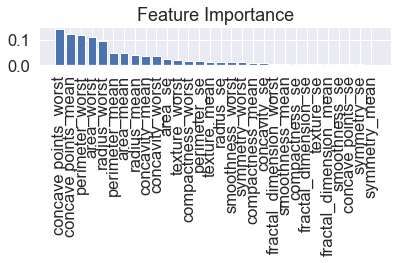

In [65]:
# Visualize Feature Importance
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]),importances[sorted_indices],
       align="center")
plt.xticks(range(X_train.shape[1]),X_train.columns[sorted_indices],
          rotation=90)
plt.tight_layout()
plt.show()

In [67]:
from joblib import dump,load
dump(rs_rf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [68]:
loaded_joblib_model=load(filename="gs_random_forest_model_1.joblib")

In [69]:
job_lib_y_preds=loaded_joblib_model.predict(X_test)


In [70]:
job_lib_y_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [72]:
loaded_joblib_model.score(X_test,y_test)

0.9649122807017544